In [7]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import glob 

from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import r2_score

In [119]:
from tensorflow.python.client import  device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 16572789708345370057,
 name: "/device:DML:0"
 device_type: "DML"
 memory_limit: 2626570240
 locality {
 }
 incarnation: 1656089777610410321
 physical_device_desc: "{\"name\": \"NVIDIA GeForce GTX 1080\", \"vendor_id\": 4318, \"device_id\": 7040, \"driver_version\": \"30.0.15.1165\"}",
 name: "/device:DML:1"
 device_type: "DML"
 memory_limit: 7449837620
 locality {
 }
 incarnation: 16194835298365347593
 physical_device_desc: "{\"name\": \"Intel(R) HD Graphics 630\", \"vendor_id\": 32902, \"device_id\": 22802, \"driver_version\": \"26.20.100.8142\"}"]

In [120]:
tf.test.is_gpu_available()


True

In [9]:
Images = Path('C:/Users/cip/Desktop/Oussama/Oussama_Horizon_Images/ALL_Horizon_Images')


In [10]:
filepaths = pd.Series(list(Images.glob(r'**/*.jpg')), name='Filepath').astype(str)

In [11]:
cl = pd.read_csv('C:/Users/cip/Desktop/Oussama/Oussama_Horizon_K/All_Horizon_L_V_R.csv')
cl_Left = cl.iloc[:,3].values
y_left = np.array(cl_Left)

y_left_V = y_left.reshape(5106 ,1)
len (y_left_V) 
y_left_V = y_left_V.reshape( 1, 5106 )
yl = y_left_V_s= pd.Series(y_left,name= 'yl')/100

print (y_left_V_s)

0       5.63
1       5.53
2       5.45
3       5.40
4       5.42
        ... 
5101    8.88
5102    8.90
5103    8.94
5104    8.96
5105    8.96
Name: yl, Length: 5106, dtype: float64


In [12]:
cl_right = cl.iloc[:,4].values
y_right =  np.array(cl_right)
y_right_V = y_right.reshape(5106,1)
len (y_right_V)
type(y_right_V)
yr= y_right_V_s= pd.Series(y_right, name= 'yr')/100
print (y_right_V_s)

0       6.59
1       6.67
2       6.70
3       6.71
4       6.70
        ... 
5101    3.23
5102    3.23
5103    3.22
5104    3.22
5105    3.22
Name: yr, Length: 5106, dtype: float64


In [13]:
filepaths = pd.Series(list(Images.glob(r'**/*.jpg')), name='Filepath').astype(str)
print (filepaths)
type(filepaths)

0       C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...
1       C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...
2       C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...
3       C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...
4       C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...
                              ...                        
5101    C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...
5102    C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...
5103    C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...
5104    C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...
5105    C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...
Name: Filepath, Length: 5106, dtype: object


pandas.core.series.Series

In [14]:

ALL_Data = pd.concat([filepaths,yl,yr], axis = 1).sample(frac = 1.0, random_state=1).reset_index(drop=True)
print(ALL_Data)

                                               Filepath     yl     yr
0     C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...   9.35   3.25
1     C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...  10.28   3.23
2     C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...   7.21   2.97
3     C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...   5.24   5.01
4     C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...   5.51   5.19
...                                                 ...    ...    ...
5101  C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...   4.93   5.56
5102  C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...   5.13   5.43
5103  C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...   2.19  10.83
5104  C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...  12.74   4.11
5105  C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...   3.79   8.50

[5106 rows x 3 columns]


In [15]:
train_Data, test_Data = train_test_split(ALL_Data, train_size = 0.7, shuffle = True, random_state = 1  )

In [16]:
print(train_Data)


                                               Filepath    yl     yr
1785  C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...  4.61   3.72
2161  C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...  6.35   2.14
605   C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...  1.84  10.24
4963  C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...  4.88   4.76
3584  C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...  4.43   4.76
...                                                 ...   ...    ...
2895  C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...  7.51   1.20
2763  C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...  3.31   7.86
905   C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...  5.17   5.66
3980  C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...  1.67  11.58
235   C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...  3.11   9.29

[3574 rows x 3 columns]


In [17]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

In [18]:
train_images = train_generator.flow_from_dataframe(
    dataframe= train_Data,
    x_col='Filepath',
    y_col=['yl'],
    target_size=(128, 102),
    color_mode='grayscale',
    class_mode='raw',
    batch_size=12,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe= train_Data,
    x_col='Filepath',
    y_col=['yl'],
    target_size=(128, 102),
    color_mode='grayscale',
    class_mode='raw',
    batch_size=12,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe= test_Data,
    x_col='Filepath',
    y_col=['yl'],
    target_size=(128, 102),
    color_mode='grayscale',
    class_mode='raw',
    batch_size=42,
    shuffle=False
)

Found 2860 validated image filenames.
Found 714 validated image filenames.
Found 1532 validated image filenames.


In [131]:
inputs = tf.keras.Input(shape=(128, 102,1))
x = tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), padding="same", activation='relu')(inputs)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
# x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(64)(x)
x = tf.keras.layers.Dense(64)(x)
outputs = tf.keras.layers.Dense(1)(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)


# outputs_1 =  tf.keras.layers.Dense(1)(x)
# model = tf.keras.Model(inputs=inputs, outputs=(outputs))

model.summary()



Model: "model_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 128, 102, 1)]     0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 128, 102, 16)      160       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 64, 51, 16)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 62, 49, 32)        4640      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 31, 24, 32)        0         
_________________________________________________________________
global_average_pooling2d_11  (None, 32)                0         
_________________________________________________________________
dense_41 (Dense)             (None, 64)                211

In [132]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [133]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mse', 'mae', 'mape']
)


In [134]:
history = model.fit(
    train_images,
    validation_data=val_images,
#       batch_size=64,
    epochs= 300,
#     callbacks=[
#         tf.keras.callbacks.EarlyStopping(
#             monitor='val_loss',
#             patience=5,
#             restore_best_weights=True
#         )
#     ]
)

Epoch 1/300
239/239 [==============================] - 30s 128ms/step - loss: 8.1042 - mean_squared_error: 8.1167 - mean_absolute_error: 2.0266 - mean_absolute_percentage_error: 44.6098 - val_loss: 6.6568 - val_mean_squared_error: 6.6377 - val_mean_absolute_error: 1.7339 - val_mean_absolute_percentage_error: 33.8935
Epoch 2/300
239/239 [==============================] - 29s 121ms/step - loss: 5.9665 - mean_squared_error: 5.9817 - mean_absolute_error: 1.7252 - mean_absolute_percentage_error: 40.3067 - val_loss: 6.1755 - val_mean_squared_error: 6.1611 - val_mean_absolute_error: 1.6799 - val_mean_absolute_percentage_error: 34.4030 - mean_squared_error: 5.2326 - mean_absolute_error: 1.5821 - mean_absolute_percen
Epoch 3/300
239/239 [==============================] - 29s 120ms/step - loss: 5.8251 - mean_squared_error: 5.8375 - mean_absolute_error: 1.7078 - mean_absolute_percentage_error: 39.8855 - val_loss: 6.7311 - val_mean_squared_error: 6.7091 - val_mean_absolute_error: 1.6881 - val_mean

In [149]:
from tensorflow.keras.models import load_model
filename = "RELU_yl_model"
model.save(filename)
loded_model_RELU_yl = load_model("RELU_yl_model")

dict_keys(['loss', 'mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error', 'val_loss', 'val_mean_squared_error', 'val_mean_absolute_error', 'val_mean_absolute_percentage_error'])


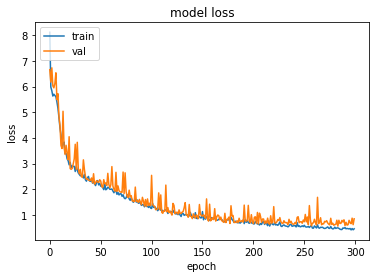

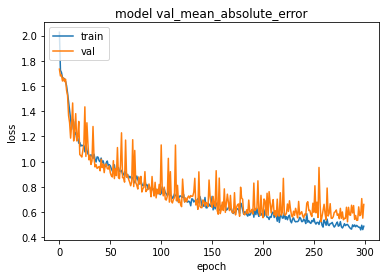

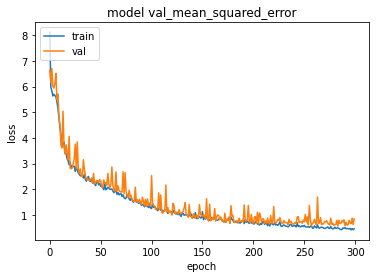

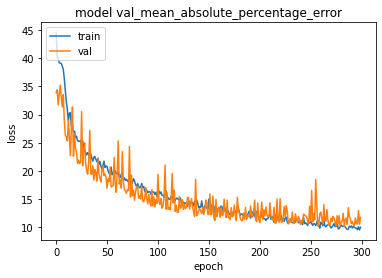

In [158]:
import matplotlib.pyplot as plt
import numpy
# list all data in history
print(history.history.keys())
# summarize history for accuracy

###Val_Loss 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
###val_mean_absolute_error
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model val_mean_absolute_error')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
###val_mean_squared_error
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model val_mean_squared_error')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
###mean_absolute_percentage_error
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('model val_mean_absolute_percentage_error')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [5]:
from tensorflow.keras.models import load_model
loded_model_RELU_yl= load_model("RELU_yl_model")

In [20]:
predicted_coordination = np.squeeze(loded_model_RELU_yl.predict(test_images))*100
true_coordination = test_images.labels*100
print('-----> The predected Coordination:')
print (predicted_coordination)
print('-----> The real Coordination:')
print(true_coordination)
print ('------> The averge Error')
rmse = np.sqrt(loded_model_RELU_yl.evaluate(test_images, verbose=1))
# print("     Test RMSE: {:.5f}".format(rmse))
print (rmse)

r2 = r2_score(true_coordination, predicted_coordination)
# print("Test R^2 Score: {:.5f}".format(r2))
print (r2)

-----> The predected Coordination:
[409.30792 740.6905  814.13605 ... 643.1481  393.25626 375.13617]
-----> The real Coordination:
[[443.]
 [741.]
 [819.]
 ...
 [658.]
 [313.]
 [502.]]
------> The averge Error
37/37 [==============================] - 12s 333ms/step - loss: 0.9462 - mean_squared_error: 0.9505 - mean_absolute_error: 0.6400 - mean_absolute_percentage_error: 11.4282
[0.97273121 0.97493841 0.79999187 3.38056416]
0.8342941549163954


In [22]:
type(predicted_coordination)
predicted_coordination_Dataframe= pd.DataFrame(predicted_coordination, columns = ['yl_p'])
type(true_coordination)
true_coordination_Dataframe= pd.DataFrame(true_coordination, columns = ['yl_t'])

yl_p = predicted_coordination_Dataframe['yl_p']
yl_t = true_coordination_Dataframe['yl_t']
# print (true_coordination_Dataframe)
# print(predicted_coordination_Dataframe)
yl_tp=  pd.concat ([yl_t,yl_p], axis = 1)
print (yl_tp)

       yl_t        yl_p
0     443.0  409.307922
1     741.0  740.690491
2     819.0  814.136047
3     895.0  879.215210
4     734.0  702.658691
...     ...         ...
1527  395.0  373.281464
1528  498.0  451.360077
1529  658.0  643.148071
1530  313.0  393.256256
1531  502.0  375.136169

[1532 rows x 2 columns]


## yl_tp.plot(y= ['yl_t'],figsize=(50, 20))

<AxesSubplot:>

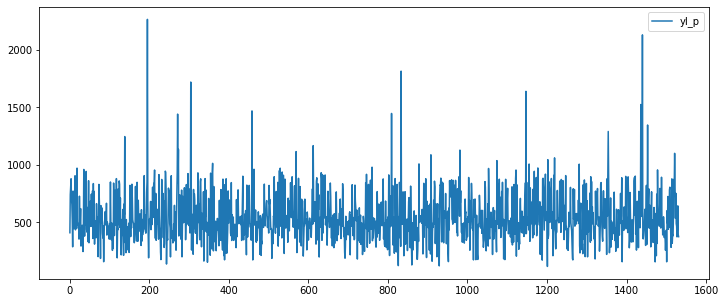

In [26]:
yl_tp.plot(y= ['yl_p'],figsize=(12,5))

<AxesSubplot:>

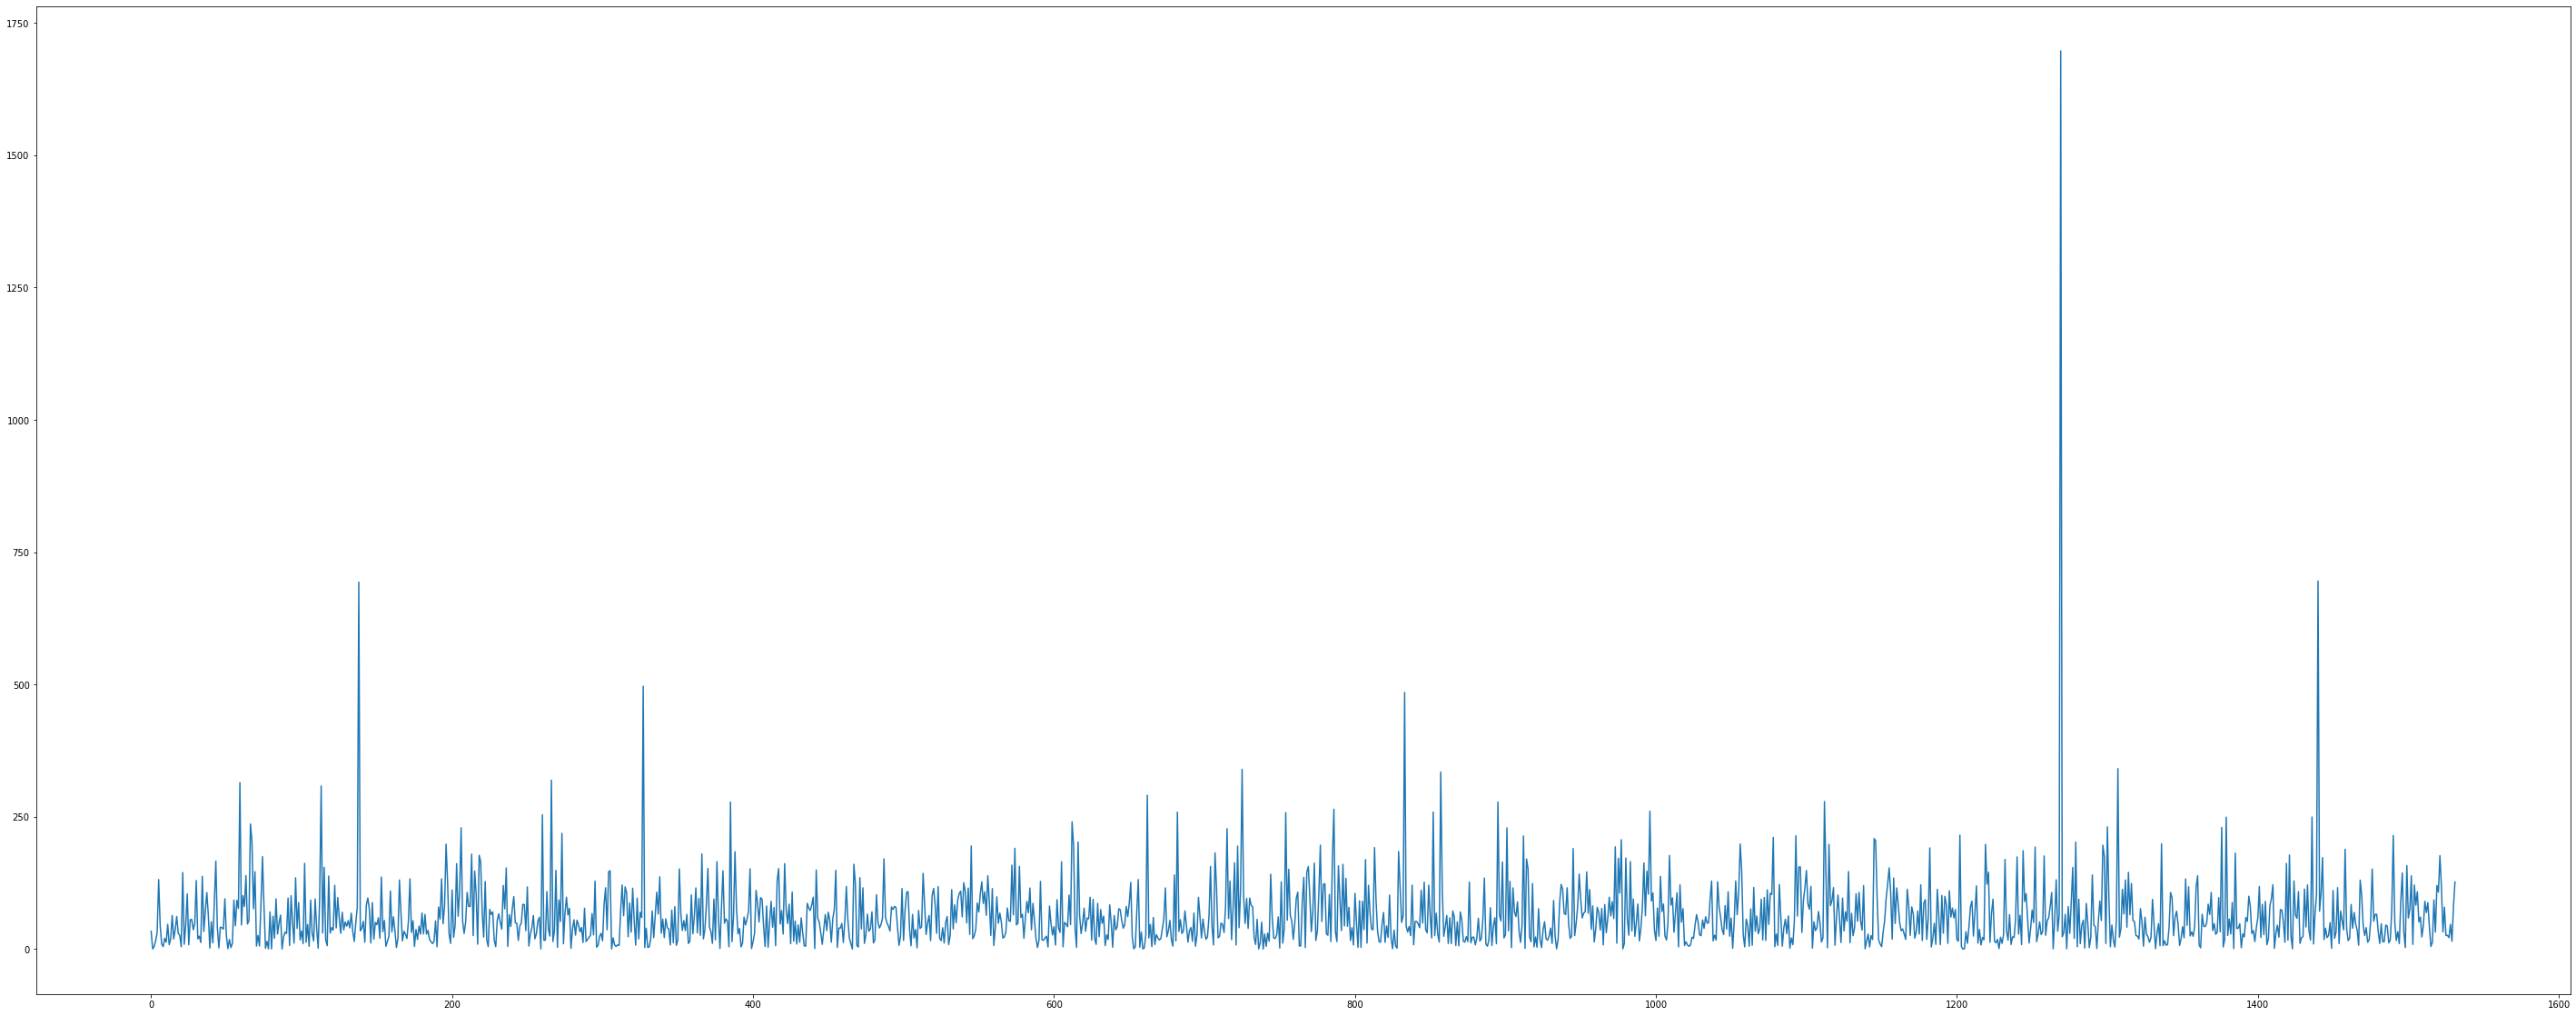

In [150]:
yl_d = abs(yl_t -yl_p)
# print(yl_d)
yl_d.plot(figsize=(50, 20))

# Model for (yr)

In [140]:
train_images_1 = train_generator.flow_from_dataframe(
    dataframe= train_Data,
    x_col='Filepath',
    y_col=['yr'],
    target_size=(128, 102),
    color_mode='grayscale',
    class_mode='raw',
    batch_size=12,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images_1 = train_generator.flow_from_dataframe(
    dataframe= train_Data,
    x_col='Filepath',
    y_col=['yr'],
    target_size=(128, 102),
    color_mode='grayscale',
    class_mode='raw',
    batch_size=12,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images_1 = test_generator.flow_from_dataframe(
    dataframe= test_Data,
    x_col='Filepath',
    y_col=['yr'],
    target_size=(128, 102),
    color_mode='grayscale',
    class_mode='raw',
    batch_size=12,
    shuffle=False
)

Found 2860 validated image filenames.
Found 714 validated image filenames.
Found 1532 validated image filenames.


In [141]:
inputs = tf.keras.Input(shape=(128, 102,1))
x = tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), padding="same", activation='relu')(inputs)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
# x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(64)(x)
x = tf.keras.layers.Dense(64)(x)
outputs = tf.keras.layers.Dense(1)(x)

model_1= tf.keras.Model(inputs=inputs, outputs=outputs)




model_1.summary()


Model: "model_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 128, 102, 1)]     0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 128, 102, 16)      160       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 64, 51, 16)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 62, 49, 32)        4640      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 31, 24, 32)        0         
_________________________________________________________________
global_average_pooling2d_12  (None, 32)                0         
_________________________________________________________________
dense_44 (Dense)             (None, 64)                211

In [97]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [117]:
model_1.compile(
    optimizer='adam',
    loss='mse',
   metrics=['mse', 'mae', 'mape']
)


In [99]:
history_1 = model_1.fit(
    train_images_1,
    validation_data=val_images_1,
#       batch_size=64,
    epochs= 300,
#     callbacks=[
#         tf.keras.callbacks.EarlyStopping(
#             monitor='val_loss',
#             patience=5,
#             restore_best_weights=True
#         )
#     ]
)

Epoch 1/300
58/58 [==============================] - 28s 490ms/step - loss: 1.2782 - mean_squared_error: 1.2879 - mean_absolute_error: 0.8042 - mean_absolute_percentage_error: 506479.0000 - val_loss: 1.0177 - val_mean_squared_error: 1.0342 - val_mean_absolute_error: 0.6656 - val_mean_absolute_percentage_error: 22.4435
Epoch 2/300
58/58 [==============================] - 24s 416ms/step - loss: 0.9616 - mean_squared_error: 0.9671 - mean_absolute_error: 0.6788 - mean_absolute_percentage_error: 632101.8125 - val_loss: 1.2166 - val_mean_squared_error: 1.2372 - val_mean_absolute_error: 0.7635 - val_mean_absolute_percentage_error: 24.6661
Epoch 3/300
58/58 [==============================] - 25s 427ms/step - loss: 1.0093 - mean_squared_error: 1.0047 - mean_absolute_error: 0.7029 - mean_absolute_percentage_error: 618990.2500 - val_loss: 1.0721 - val_mean_squared_error: 1.0830 - val_mean_absolute_error: 0.6787 - val_mean_absolute_percentage_error: 23.1214
Epoch 4/300
58/58 [=====================

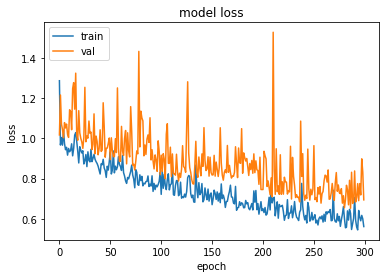

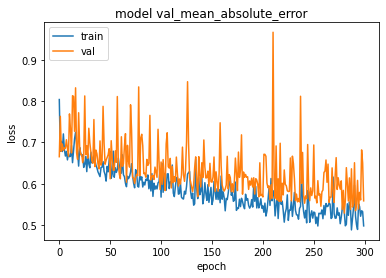

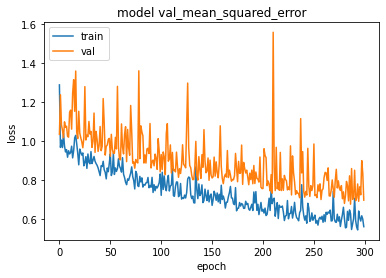

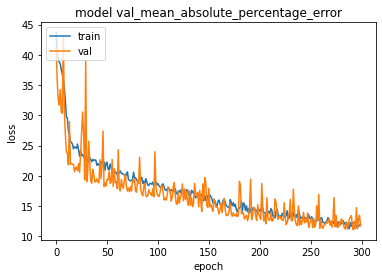

In [104]:
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
###val_mean_absolute_error
plt.plot(history_1.history['mean_absolute_error'])
plt.plot(history_1.history['val_mean_absolute_error'])
plt.title('model val_mean_absolute_error')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
###val_mean_squared_error
plt.plot(history_1.history['mean_squared_error'])
plt.plot(history_1.history['val_mean_squared_error'])
plt.title('model val_mean_squared_error')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
###mean_absolute_percentage_error
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('model val_mean_absolute_percentage_error')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [151]:
predicted_coordination = np.squeeze(model_1.predict(test_images_1))*100
true_coordination = test_images_1.labels*100
print('-----> The predected Coordination:')
print (predicted_coordination)
print('-----> The real Coordination:')
print(true_coordination)
print ('------> The averge Error')
rmse = np.sqrt(model_1.evaluate(test_images_1, verbose=1))
# print("     Test RMSE: {:.5f}".format(rmse))
print (rmse)

r2 = r2_score(true_coordination, predicted_coordination)
# print("Test R^2 Score: {:.5f}".format(r2))
print (r2)

-----> The predected Coordination:
[20.153131 18.770432 18.971222 ... 15.563412 12.599669 17.155901]
-----> The real Coordination:
[[526.]
 [562.]
 [542.]
 ...
 [158.]
 [819.]
 [564.]]
------> The averge Error


RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.